In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [5]:
df=pd.read_csv('/kaggle/input/indian-startup-funding/startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
df.drop(columns=['Remarks'],inplace=True)

In [7]:
df.set_index('Sr No',inplace=True)

In [10]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
    
    
},inplace=True)

In [11]:
df['amount']=df['amount'].fillna('0')

In [12]:
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','')
df['amount']=df['amount'].replace('','0')

In [109]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [13]:
df=df[df['amount'].str.isdigit()]

In [14]:
df['amount']=df['amount'].astype('float')

/tmp/ipykernel_33/3595834934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount']=df['amount'].astype('float')


In [113]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [15]:
def to_inr(dollar):
    inr=dollar*83.75
    return inr/10000000

In [16]:
df['amount']=df['amount'].apply(to_inr)

/tmp/ipykernel_33/4236546661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount']=df['amount'].apply(to_inr)


In [17]:
df['amount']


NameError: name 'amount' is not defined

In [18]:
df['date']=df['date'].str.replace('01/13/2020','13/01/2020')
df['date']=df['date'].str.replace('12/13/2019','13/12/2019')
df['date']=df['date'].str.replace('05/072018','05/07/2018')

/tmp/ipykernel_33/1828573512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['date'].str.replace('01/13/2020','13/01/2020')
/tmp/ipykernel_33/1828573512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['date'].str.replace('12/13/2019','13/12/2019')
/tmp/ipykernel_33/1828573512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [20]:
df['date']=pd.to_datetime(df['date'],dayfirst=True,errors='coerce')

In [21]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1675.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.405300
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,153.755452
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.125000
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.075000


In [22]:
df=df.dropna(subset=['date','startup','city', 'investors', 'round' ,'amount'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [24]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [145]:
df.to_csv('startup_cleaned.csv',index=False)

In [33]:
df[df['investors'].str.contains('IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,30.077766
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,1005.000000
259,2018-05-02,Bizongo,Consumer Internet,Mumbai,Private Equity,184.250000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,46.062500
439,2017-12-07,eShakti,Ecommerce,Chennai,Debt Funding,19.262500


In [38]:
df[df['investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 1005.000000
Lenskart                  502.500000
Bizongo                   209.375000
CureFit                   209.375000
Curefit                   125.625000
Fintellix                 125.625000
Xpressbees                104.687500
FirstCry.com               83.750000
Uniphore                   73.700000
POPxo                      72.025000
HealthifyMe                50.250000
\\xc2\\xa0CloudCherry      50.250000
Sigtuple                   48.575000
Flyrobe                    44.387500
RentMojo                   41.875000
Aasaanjobs                 41.875000
Vayana                     33.500000
Agrostar                   33.500000
PlaySimple                 33.500000
Blowhorn                   30.568750
Tripoto                    30.077766
Active.ai                  25.125000
Heckyl                     22.612500
CreditMantri               20.937500
eShakti                    19.262500
Zimmber                    16.750000
POPxo.com                  16.

<Axes: ylabel='amount'>

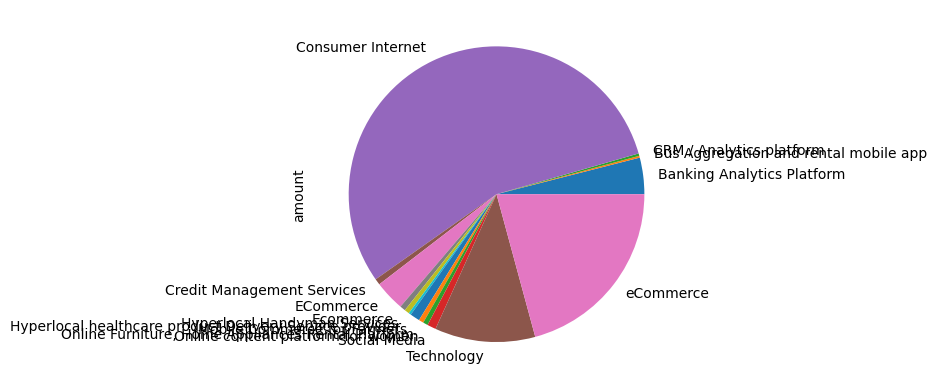

In [55]:
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

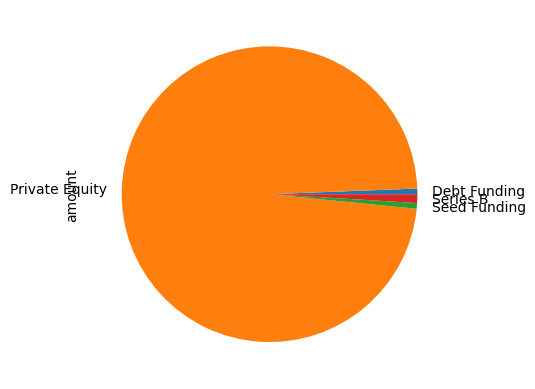

In [63]:
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

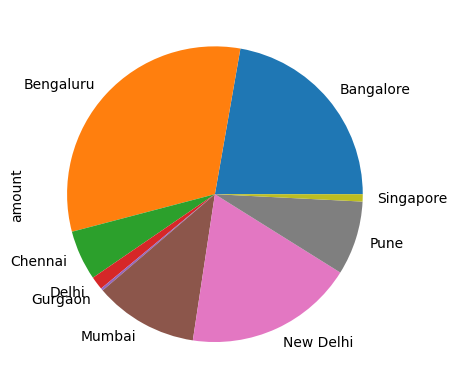

In [69]:
df[df['investors'].str.contains('IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [85]:
df['year']=df['date'].dt.year

<Axes: xlabel='year'>

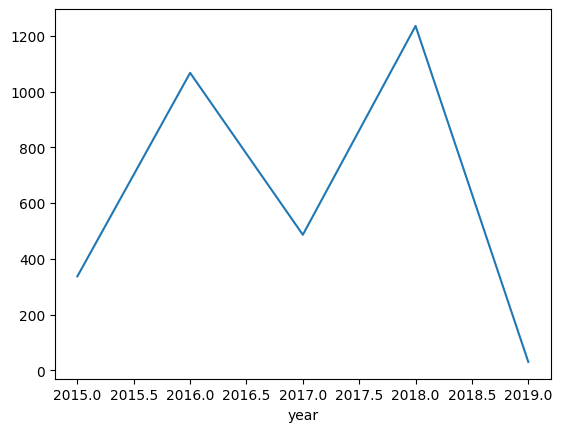

In [76]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()

KeyError: "df['date'].dt.year"

In [88]:
round(df['amount'].sum())

300963

In [91]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

32662.5

In [94]:
df['month']=df['date'].dt.month

In [98]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,4,61
1,2015,5,55
2,2015,6,84
3,2015,7,85
4,2015,8,98
5,2015,9,87
6,2015,10,93
7,2015,11,90
8,2015,12,88
9,2016,1,104


In [105]:
temp_df=df.groupby(['year','month'])['amount'].count().reset_index()

In [111]:
 temp_df['x_axis']=temp_df['month'].astype(str)+ '-' + temp_df['year'].astype(str)

In [112]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,61,4-2015
1,55,5-2015
2,84,6-2015
3,85,7-2015
4,98,8-2015
5,87,9-2015
6,93,10-2015
7,90,11-2015
8,88,12-2015
9,104,1-2016
